# Bank Personal Loan Modelling
### (Campaign for selling personal loans)

### Business Objective :
To build a machine learning model that will help retail marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Problem Statement :
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

### Dataset Overview:
The file Bank.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


### Dataset Column's description :
								
- ID -Customer ID							
- Age - Customer's age in completed years							
- Experience - years of professional experience							
- Income - Annual income of the customer (<span>$000</span>)			
- ZIPCode - Home Address ZIP code.							
- Family - Family size of the customer							
- CCAvg - Avg. spending on credit cards per month 							
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
- Mortgage - Value of house mortgage if any. 						
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?							
- Securities Account - Does the customer have a securities account with the bank?							
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?							
- Online - Does the customer use internet banking facilities?							
- CreditCard - Does the customer use a credit card issued by UniversalBank?							

## 1. Exploratory Data Analysis
### Reading Data

In [1]:
# Importing necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
df = pd.read_csv(r'C:\Users\MOHIT CHOUKSEY\Bank_Personal_Loan_Modelling\Bank.csv')

# converting csv file to excel file if needed to do some task in MS-Excel in future
df.to_excel(r'C:\Users\MOHIT CHOUKSEY\Bank_Personal_Loan_Modelling\Bank.xlsx', index = None, header = True)

In [3]:
# printing first five rows of dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)

Number of data points :  5000
Number of features :  14
Features :  ['ID' 'Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account' 'Online'
 'CreditCard']


In [5]:
# looking for the quick description of the data, the total no.of rows and each attribute's type and no. of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [7]:
#statistical summary of each attribute

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# checking for null values 

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

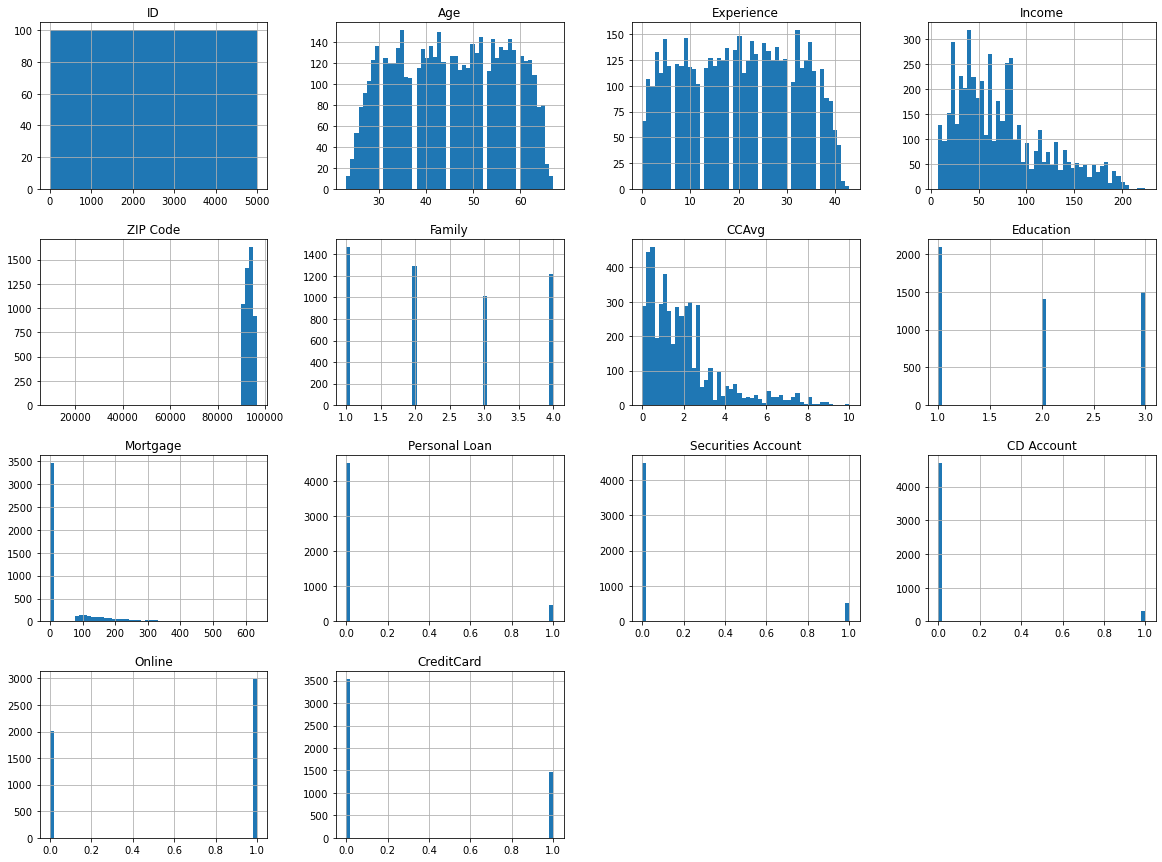

In [10]:
# Plotting Histogram for each numerical attribute

df.hist(bins = 50, figsize = (20, 15))
plt.show()

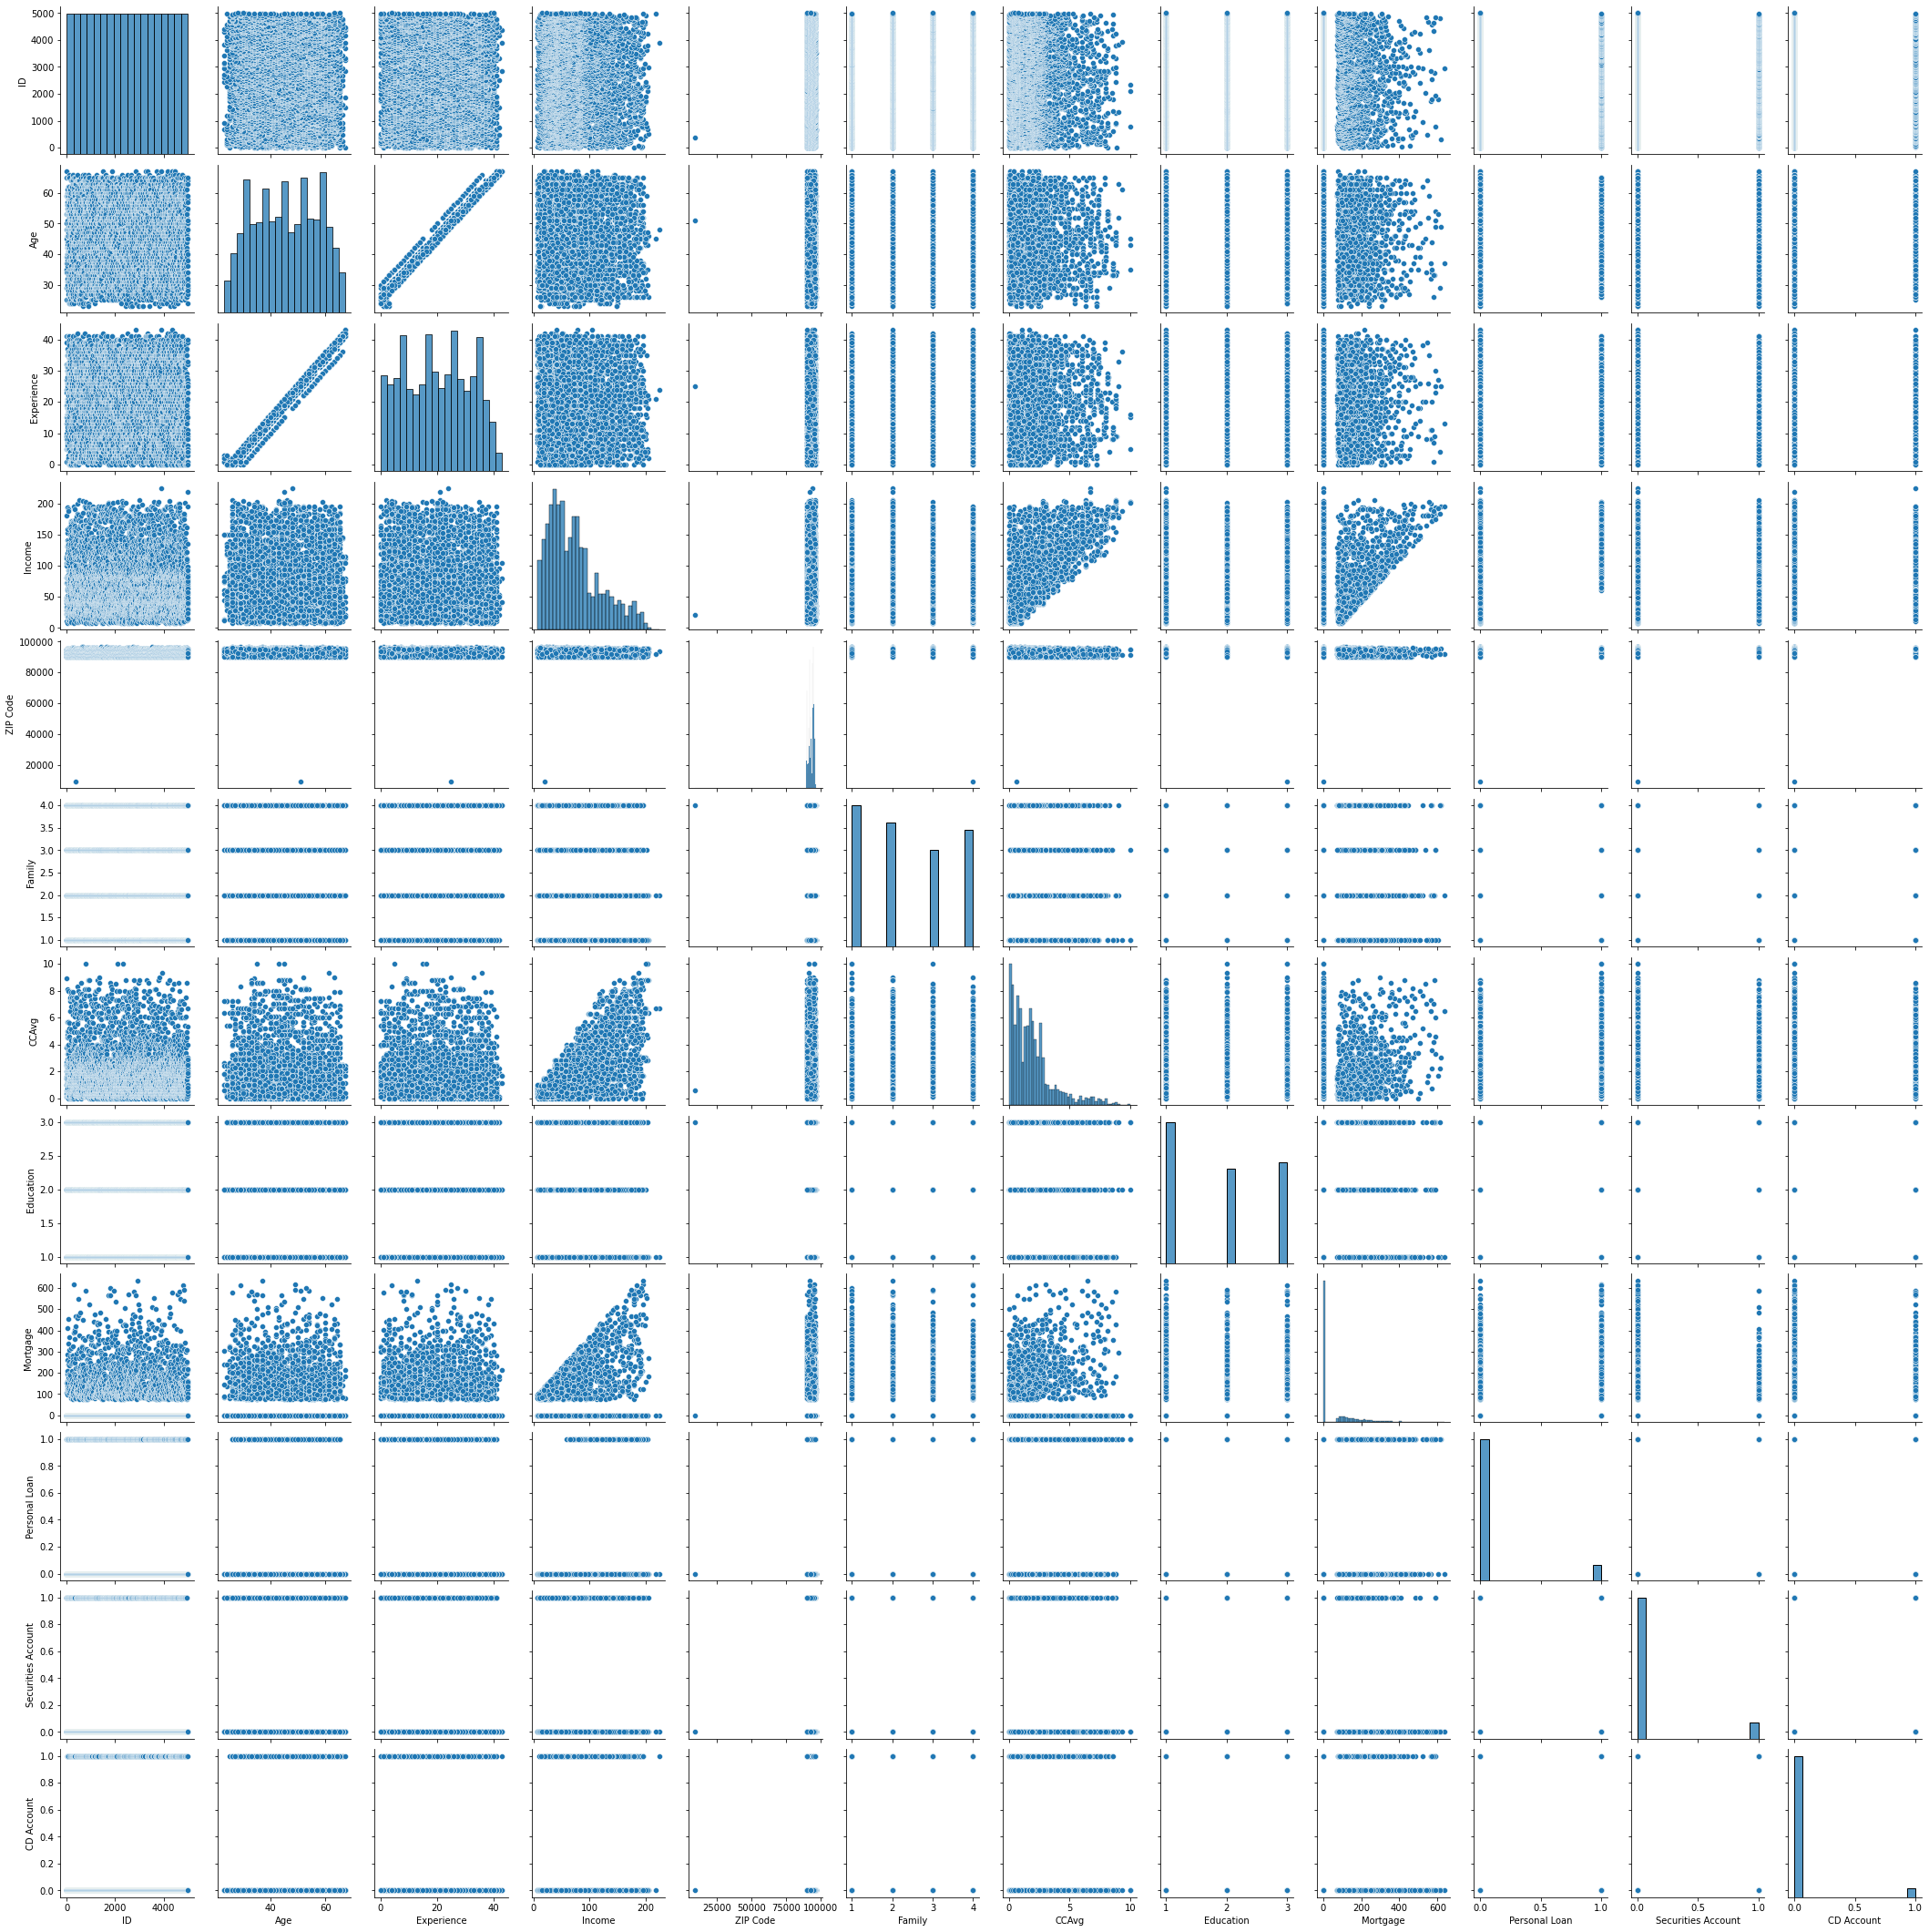

In [11]:
#importing seaborn for statistical plots
import seaborn as sns
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

-  Age and experience have strong positive relation
- Age and income have no linear relationship
-  Age and experience have no linear relationship

In [12]:
# looking at how much each attribute correlates with the personal loan 
corr_matrix = df.corr()

corr_matrix['Personal Loan'].sort_values(ascending = False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Experience           -0.008304
ID                   -0.024801
Name: Personal Loan, dtype: float64

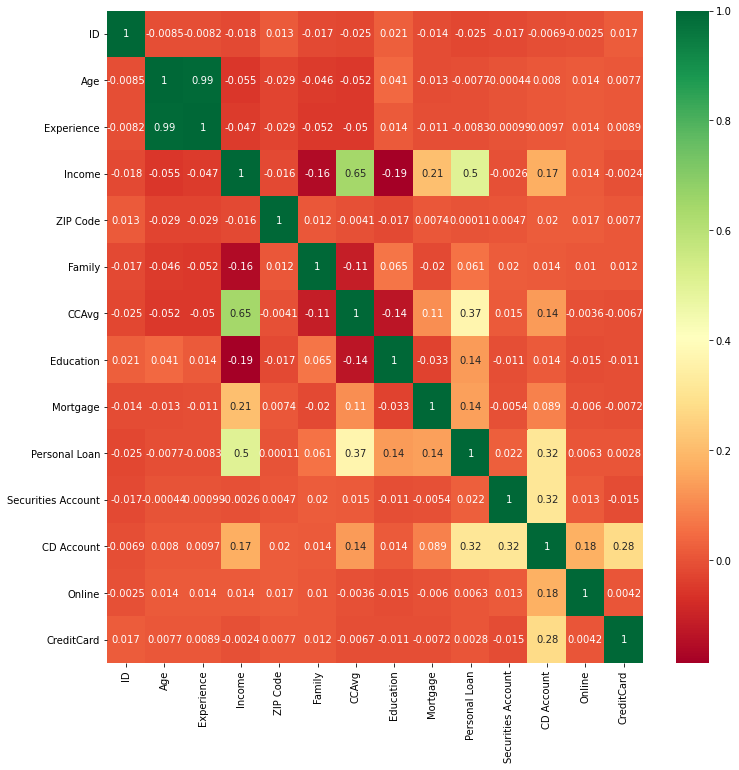

In [42]:
# Finding correlation between Independent and dependent attributes

plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [14]:
df.groupby(["Personal Loan"]).count()  

# The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### Creating Test set


In [15]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']

In [16]:
X_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [17]:
y_df

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


# 2. Model Training 

In [18]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [19]:
X_train.shape

(3000, 10)

In [20]:
X_test.shape

(2000, 10)

## Logistic Model

In [21]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.919
[[1760   56]
 [ 106   78]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# The accuracy score of .91 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model

print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1816
           1       0.58      0.42      0.49       184

    accuracy                           0.92      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.91      0.92      0.91      2000



In [23]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

## Naive Bayes Model 

In [24]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))


model_score = model.score(X_test, y_test)
print(model_score)

[[1692  124]
 [  74  110]]
0.901


In [25]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1816
           1       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



In [26]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

## K Nearest Neighbours 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [28]:
predicted_labels = NNH.predict(X_test)

In [29]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1783   33]
 [ 169   15]]


In [30]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1816
           1       0.31      0.08      0.13       184

    accuracy                           0.90      2000
   macro avg       0.61      0.53      0.54      2000
weighted avg       0.86      0.90      0.87      2000



In [31]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [32]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [33]:
predicted_labels = NNH.predict(X_test_scaled)

In [34]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1809    7]
 [  78  106]]


In [35]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1816
           1       0.94      0.58      0.71       184

    accuracy                           0.96      2000
   macro avg       0.95      0.79      0.85      2000
weighted avg       0.96      0.96      0.95      2000



In [36]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

In [50]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)

rnd_clf.fit(X_train, y_train)

model_score = rnd_clf.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9835
[[1692  124]
 [  74  110]]


In [51]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1816
           1       0.94      0.58      0.71       184

    accuracy                           0.96      2000
   macro avg       0.95      0.79      0.85      2000
weighted avg       0.96      0.96      0.95      2000

